In [2]:
#import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read the csv file
df = pd.read_csv('data-HW2.csv')
#preview the first 5 rows
df.head()


,date,RefSt,Sensor_MLR_O3,Sensor_SVR_O3
0,10/05/2017 00:00,72.0,78.51,70.37
1,10/05/2017 01:00,60.0,66.49,59.77
2,10/05/2017 02:00,62.0,54.47,49.16
3,10/05/2017 03:00,87.0,71.58,65.94
4,10/05/2017 04:00,72.0,74.07,67.78


In [4]:
#covert the data to datatime
df['date'] = pd.to_datetime(df['date'])
#set the date as index
df.set_index('date', inplace=True)
#gruop the data by day
dayGrup = df.groupby(df.index.date)


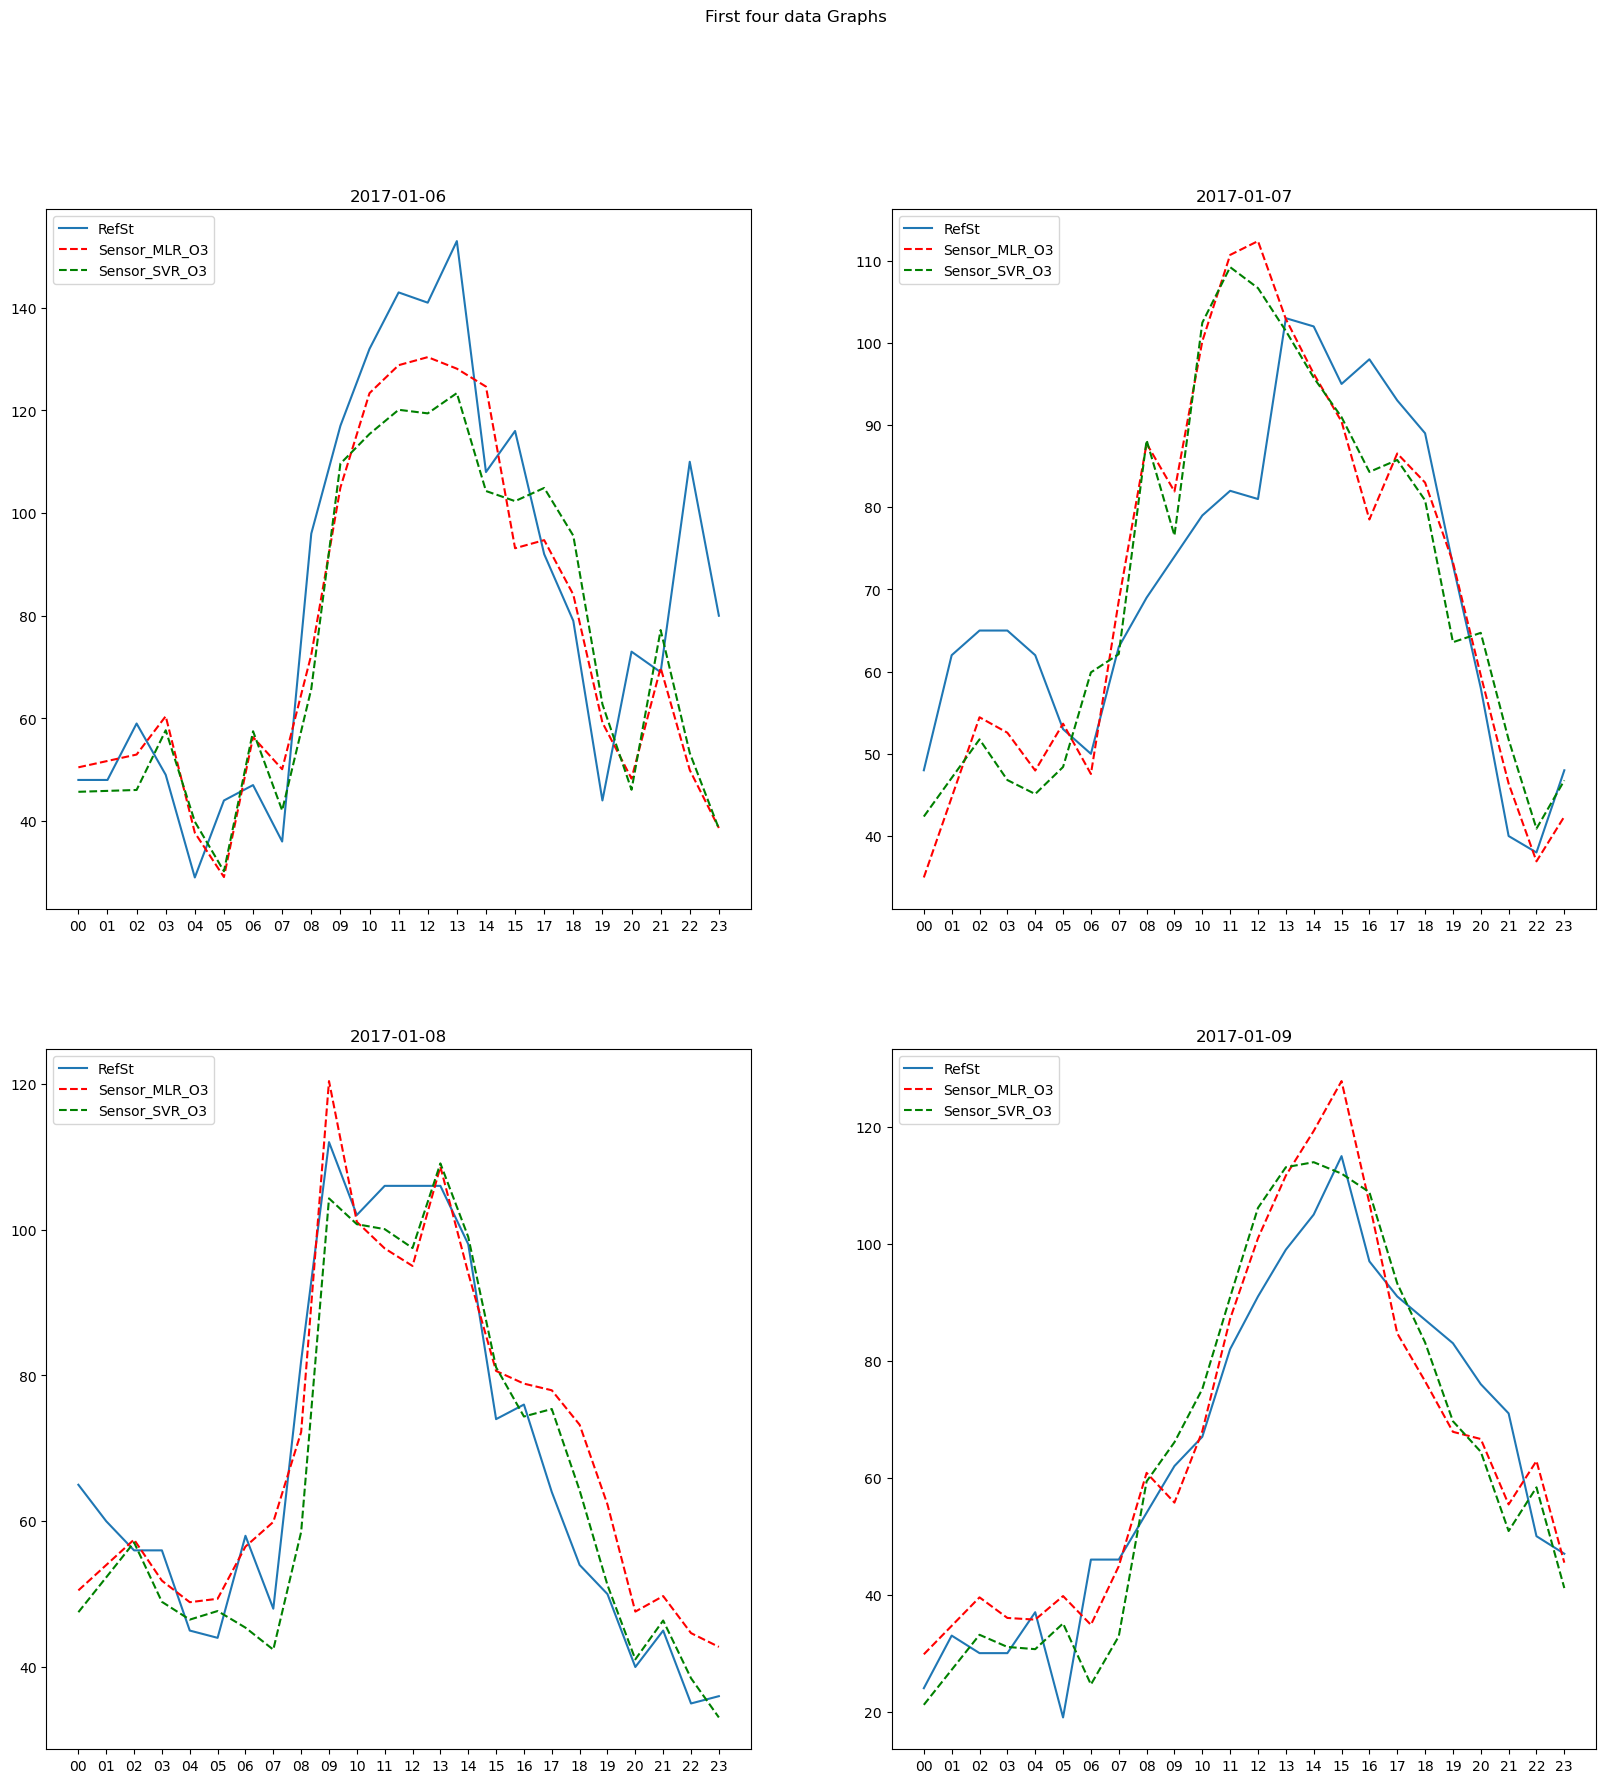

In [5]:
#plot the first four data in 4 subplots
i =0
fig, axs = plt.subplots(2, 2)

for day, group in dayGrup:
    if i > 3:
        break
    #df.index.time cast to a string
    if i==0 :
        axs[0,0].plot(group.index.strftime("%H"), group['RefSt'])
        axs[0,0].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[0,0].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green') 
        axs[0,0].set_title(day)
        #add legend
        axs[0,0].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    elif i==1:
        axs[0,1].plot(group.index.strftime("%H"), group['RefSt'])
        axs[0,1].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[0,1].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green') 
        axs[0,1].set_title(day)
        #add legend
        axs[0,1].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    elif i==2:
        axs[1,0].plot(group.index.strftime("%H"), group['RefSt'])
        axs[1,0].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[1,0].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green') 
        axs[1,0].set_title(day)
        #add legend
        axs[1,0].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    elif i==3:
        axs[1,1].plot(group.index.strftime("%H"), group['RefSt'])
        axs[1,1].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[1,1].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green')
        axs[1,1].set_title(day)
        #add legend
        axs[1,1].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    i+=1

fig.set_figheight(20)
fig.set_figwidth(20)
# Add a title to the figure
fig.suptitle('First four data Graphs')

# Display the figure
plt.show()


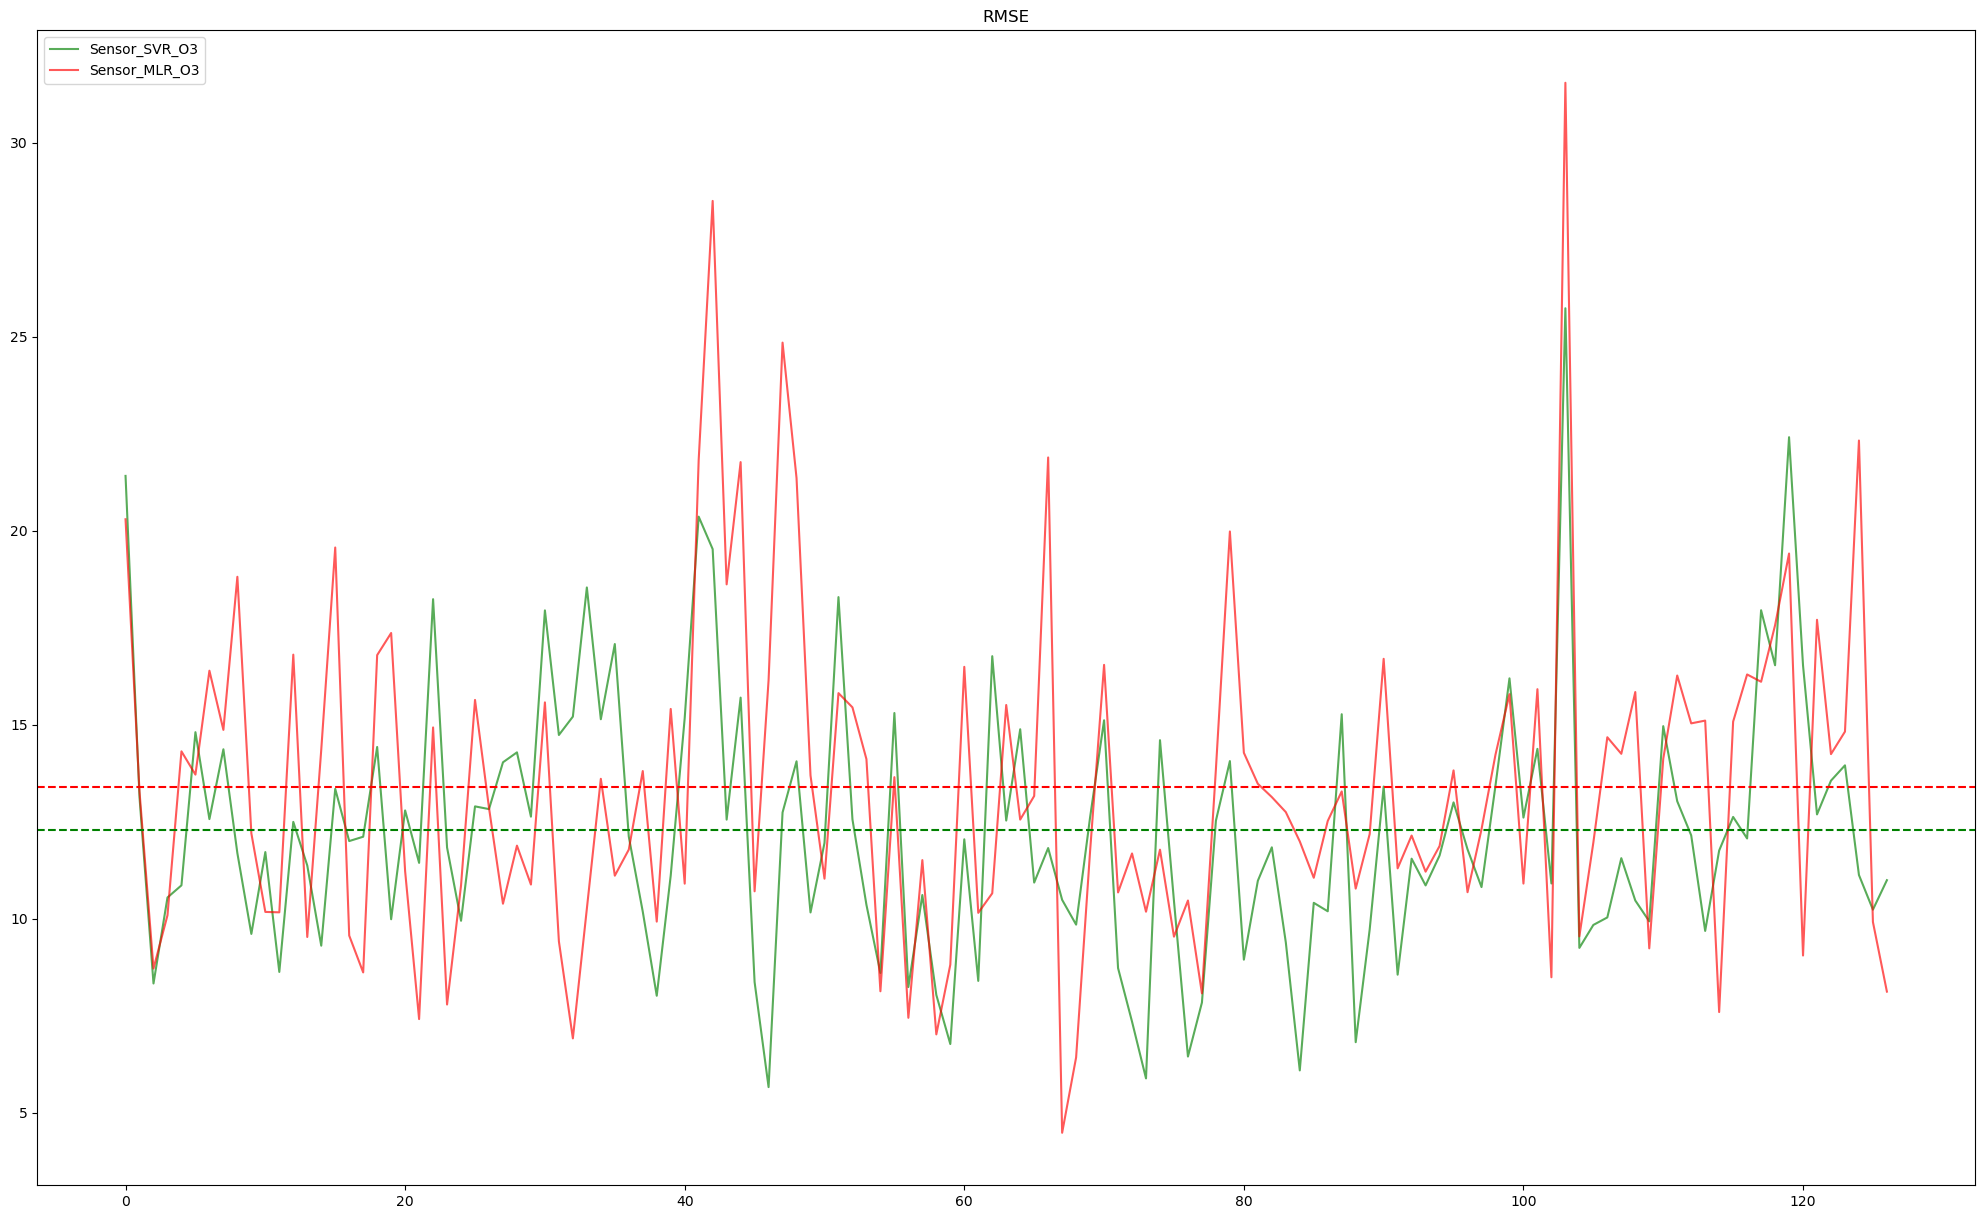

mean_MLR:  13.393824106897734
mean_SVR:  12.281928134802973


In [6]:
#calculate the RMSE for each day
from sklearn.metrics import mean_squared_error
#make lists of RMSE
RMSE_MLR = []
RMSE_SVR = []
#calculate the RMSE for each day
for day, group in dayGrup:
    RMSE_MLR.append(np.sqrt(mean_squared_error(group['RefSt'], group['Sensor_MLR_O3'])))
    RMSE_SVR.append(np.sqrt(mean_squared_error(group['RefSt'], group['Sensor_SVR_O3'])))
#plot the RMSE
plt.plot(RMSE_SVR, color='green',alpha=0.65)
plt.plot(RMSE_MLR,  color='red',alpha=0.65)
plt.legend(['Sensor_SVR_O3', 'Sensor_MLR_O3'], loc='upper left')
plt.title('RMSE')
#calculate the mean of RMSE
mean_MLR = np.mean(RMSE_MLR)
mean_SVR = np.mean(RMSE_SVR)

# Display the mean on the plot
plt.axhline(mean_MLR, color='red', linestyle='dashed')
plt.axhline(mean_SVR, color='green', linestyle='dashed')
#set the dimensions of the figure
plt.gcf().set_size_inches(25, 15)
plt.show()

print('mean_MLR: ', mean_MLR)
print('mean_SVR: ', mean_SVR)


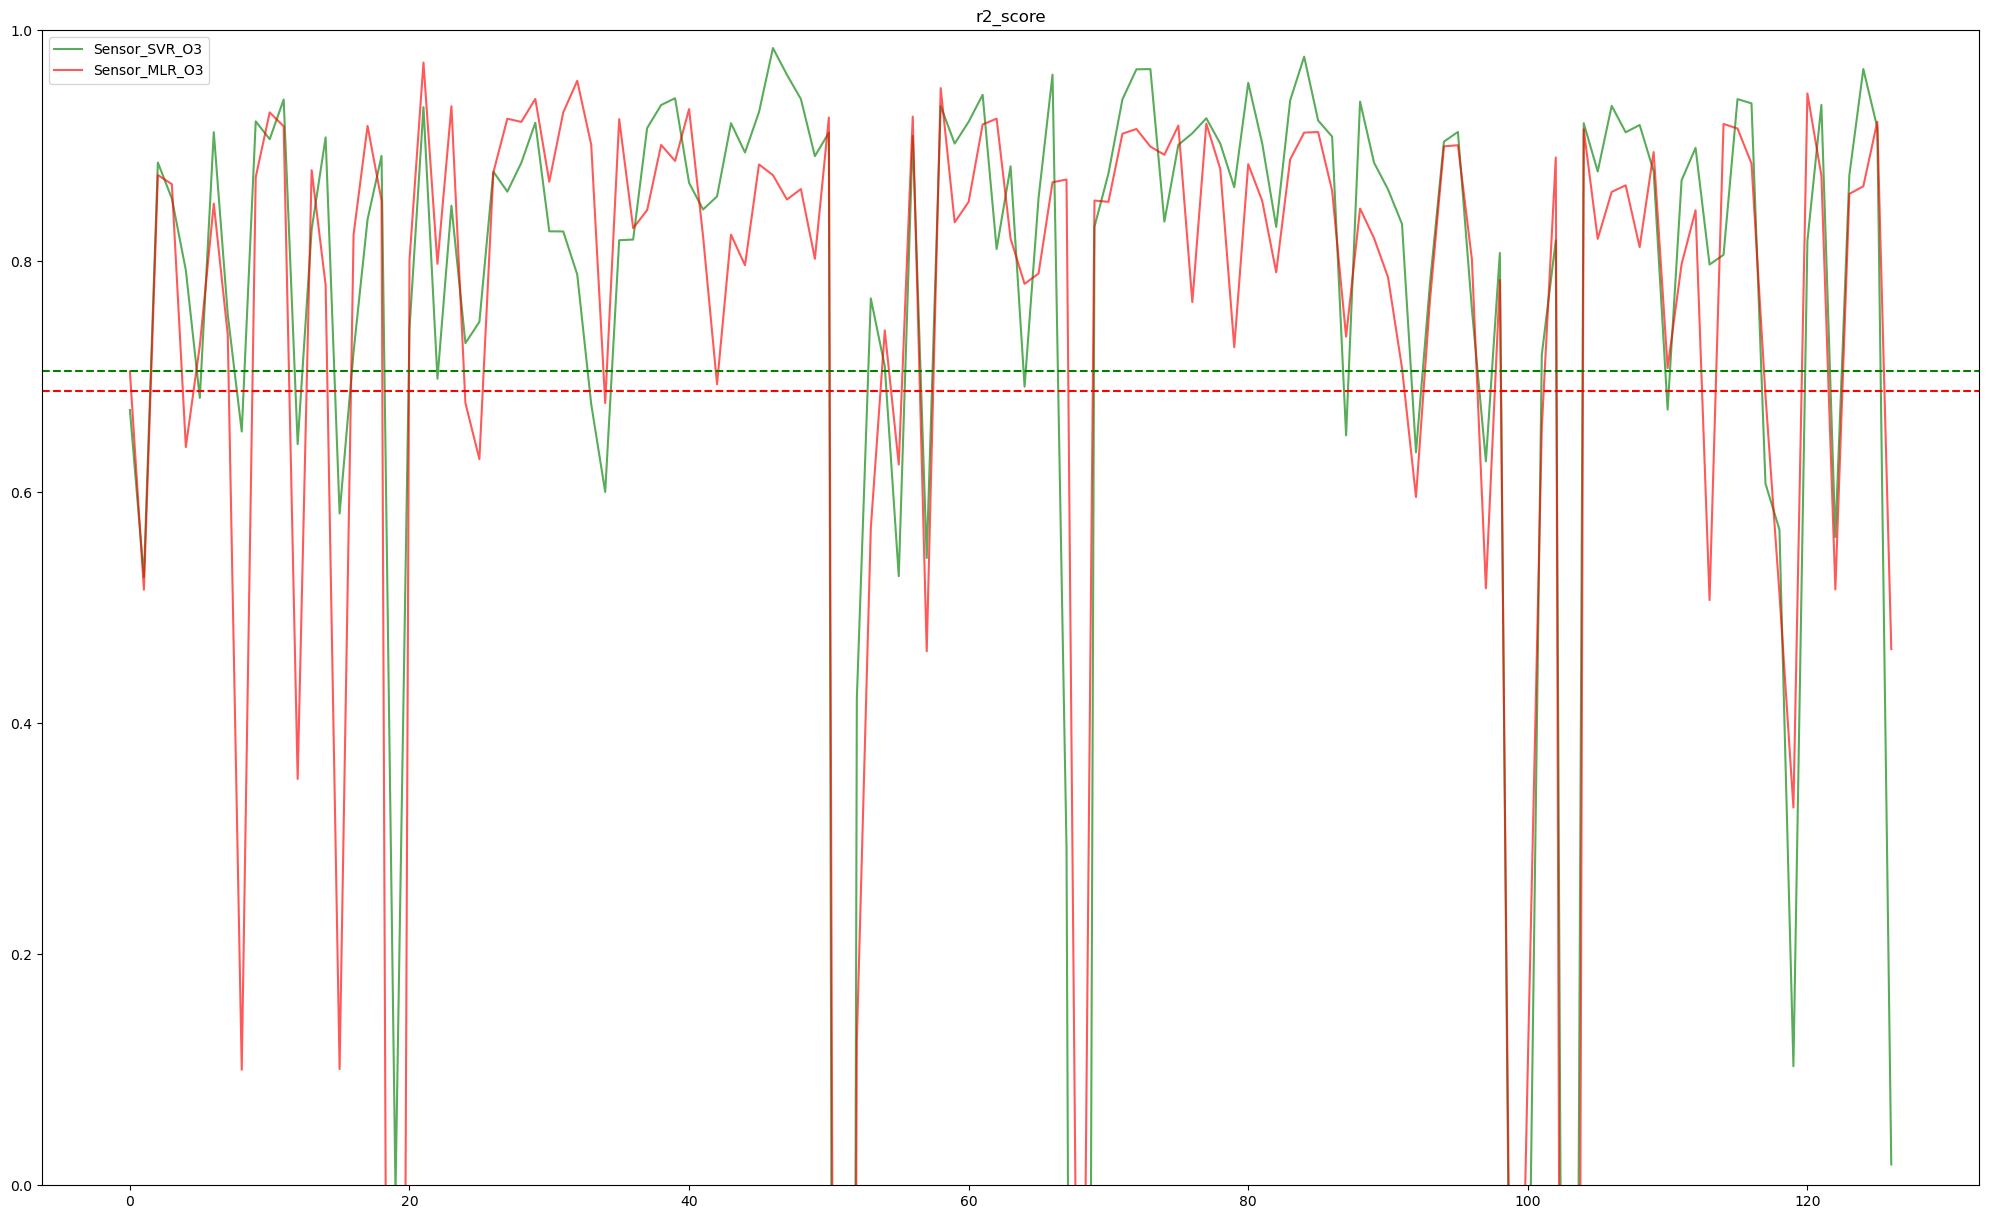

mean of r2_MLR:  0.6876422030341486
mean of r2_SVR:  0.7052046131107556


In [7]:
#calcultae r2_score for each day
from sklearn.metrics import r2_score    
r2_MLR = []
r2_SVR = []
#calculate the r2_score for each day
for day, group in dayGrup:
    r2_MLR.append(r2_score(group['RefSt'], group['Sensor_MLR_O3'],force_finite=False))
    r2_SVR.append(r2_score(group['RefSt'], group['Sensor_SVR_O3'],force_finite=False))

#plot the r2_score
plt.plot(r2_SVR, color='green',alpha=0.65)
plt.plot(r2_MLR,  color='red',alpha=0.65)
plt.legend(['Sensor_SVR_O3', 'Sensor_MLR_O3'], loc='upper left')
plt.title('r2_score')
# Display the mean on the plot
plt.axhline(np.mean(r2_MLR), color='red', linestyle='dashed')
plt.axhline(np.mean(r2_SVR), color='green', linestyle='dashed')
#crop the plot to excludenegative the  values
plt.ylim(bottom=0)
plt.ylim(top=1)
#set the dimensions of the figure
plt.gcf().set_size_inches(25, 15)
plt.show()

print('mean of r2_MLR: ', np.mean(r2_MLR))
print('mean of r2_SVR: ', np.mean(r2_SVR))


not complete days:  23
2017-01-06
2017-05-06
2017-05-10
2017-05-17
2017-06-16
2017-06-25
2017-06-26
2017-06-29
2017-07-07
2017-07-08
2017-07-09
2017-07-16
2017-07-22
2017-07-23
2017-07-25
2017-07-27
2017-08-16
2017-09-14
2017-09-15
2017-09-19
2017-09-23
2017-09-30
2017-12-07


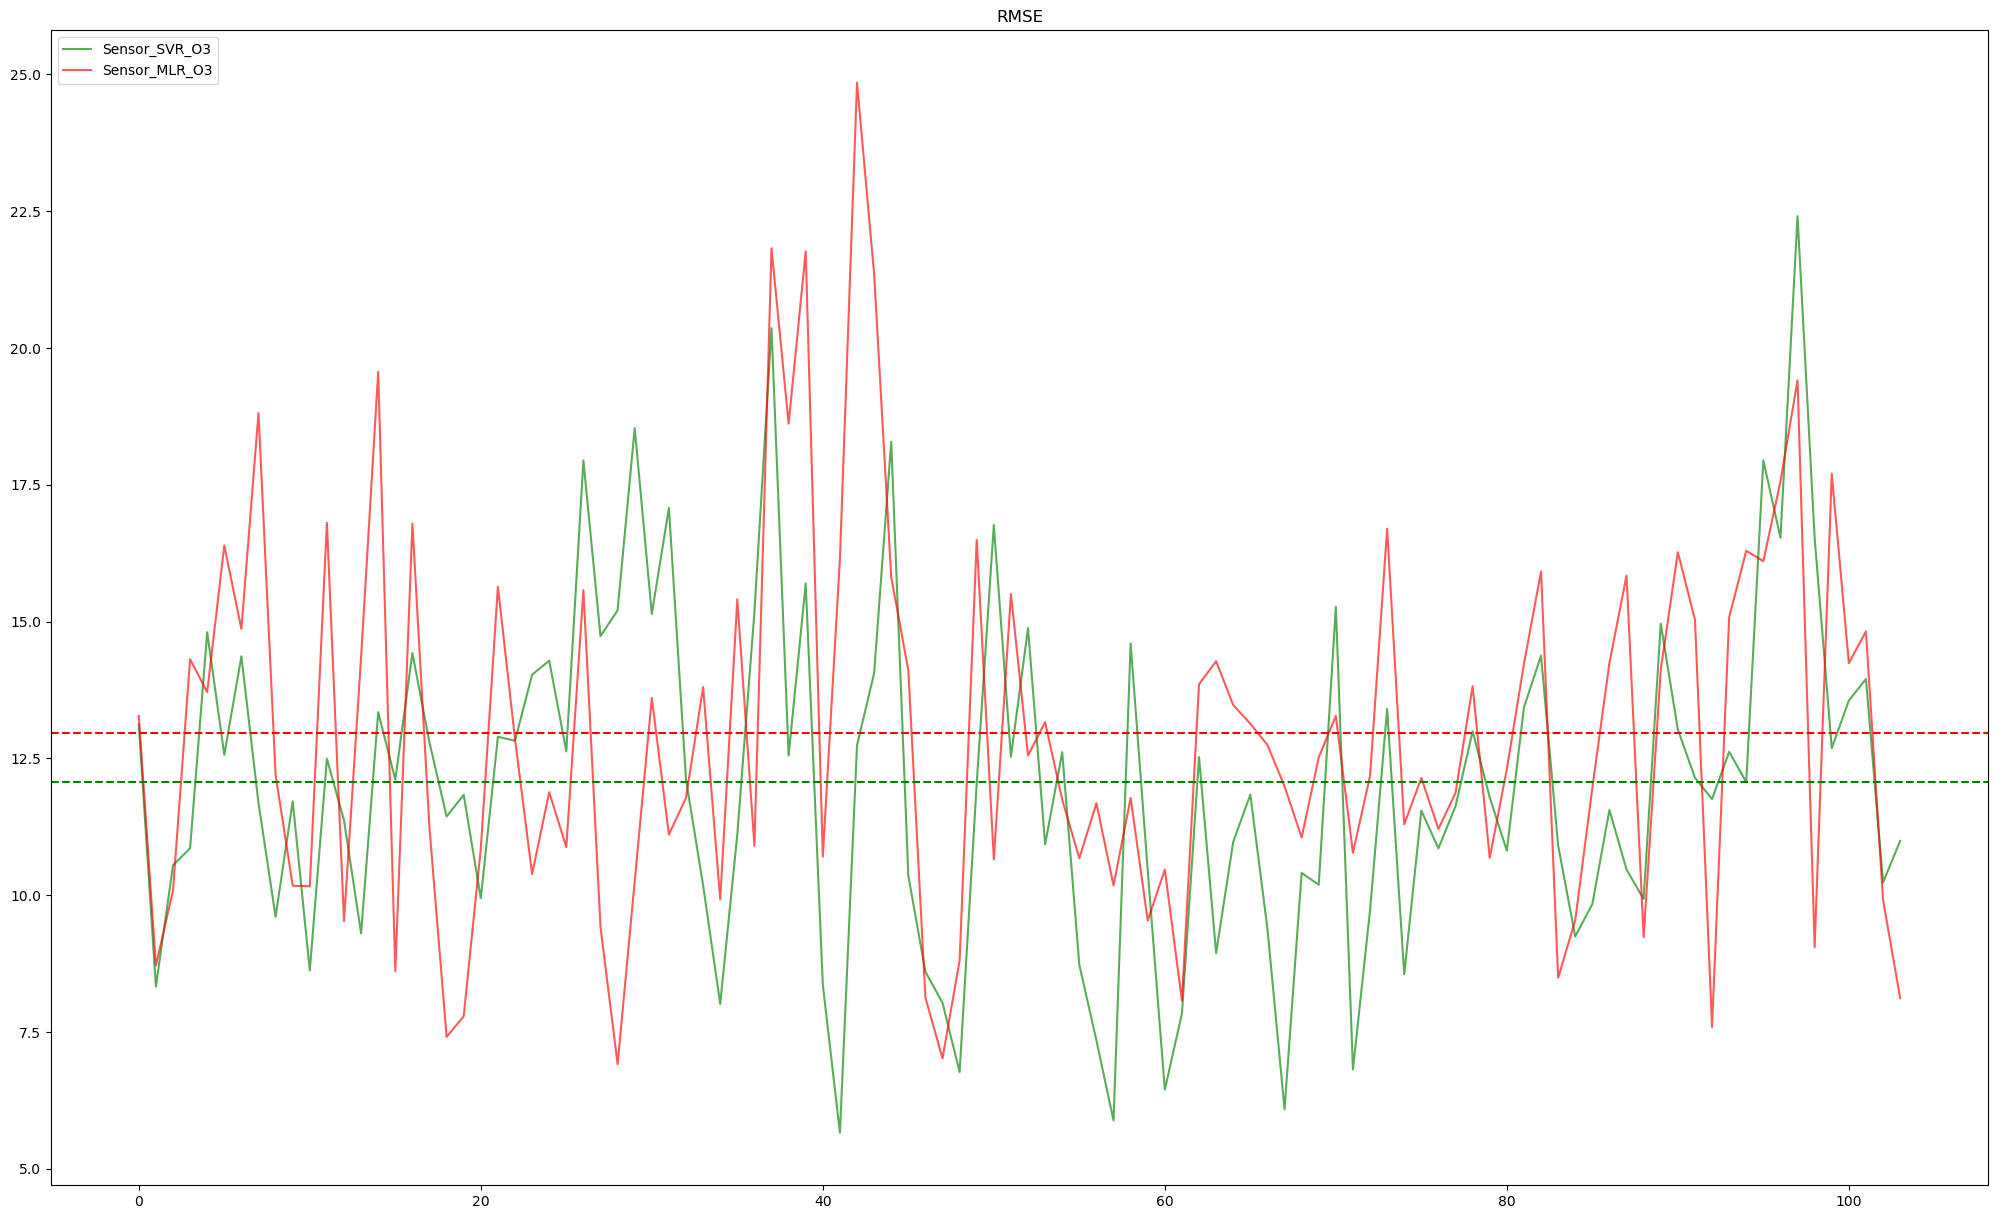

mean_MLR_complete:  12.959360108792042
mean_SVR_complete:  12.064619530018811


In [8]:
#create a dataframe with the complete days
filtered: pd.DataFrame = dayGrup.filter(lambda x: len(x) == 24)
completeDays: pd.DataFrame = filtered.groupby(filtered.index.date)

#create a dataframe with the incomplete days
filtered_incomplete = pd.DataFrame = dayGrup.filter(lambda x: len(x) != 24)
filtered_incompleteDF: pd.DataFrame = filtered_incomplete.groupby(filtered_incomplete.index.date)

#print the incomplete days
print('not complete days: ', len(dayGrup)-len(completeDays))
for day, group in filtered_incompleteDF:
    print(day)

#compute the RMSE for the complete days
RMSE_MLR_complete = []
RMSE_SVR_complete = []

for day, group in completeDays:
    RMSE_MLR_complete.append(np.sqrt(mean_squared_error(group['RefSt'], group['Sensor_MLR_O3'])))
    RMSE_SVR_complete.append(np.sqrt(mean_squared_error(group['RefSt'], group['Sensor_SVR_O3'])))
#plot the RMSE
plt.plot(RMSE_SVR_complete, color='green',alpha=0.65)
plt.plot(RMSE_MLR_complete,  color='red',alpha=0.65)
plt.legend(['Sensor_SVR_O3', 'Sensor_MLR_O3'], loc='upper left')
plt.title('RMSE')
#calculate the mean of RMSE
mean_MLR_complete = np.mean(RMSE_MLR_complete)
mean_SVR_complete = np.mean(RMSE_SVR_complete)

# Display the mean on the plot
plt.axhline(mean_MLR_complete, color='red', linestyle='dashed')
plt.axhline(mean_SVR_complete, color='green', linestyle='dashed')
#set the dimensions of the figure
plt.gcf().set_size_inches(25, 15)
plt.show()

print('mean_MLR_complete: ', mean_MLR_complete)
print('mean_SVR_complete: ', mean_SVR_complete)




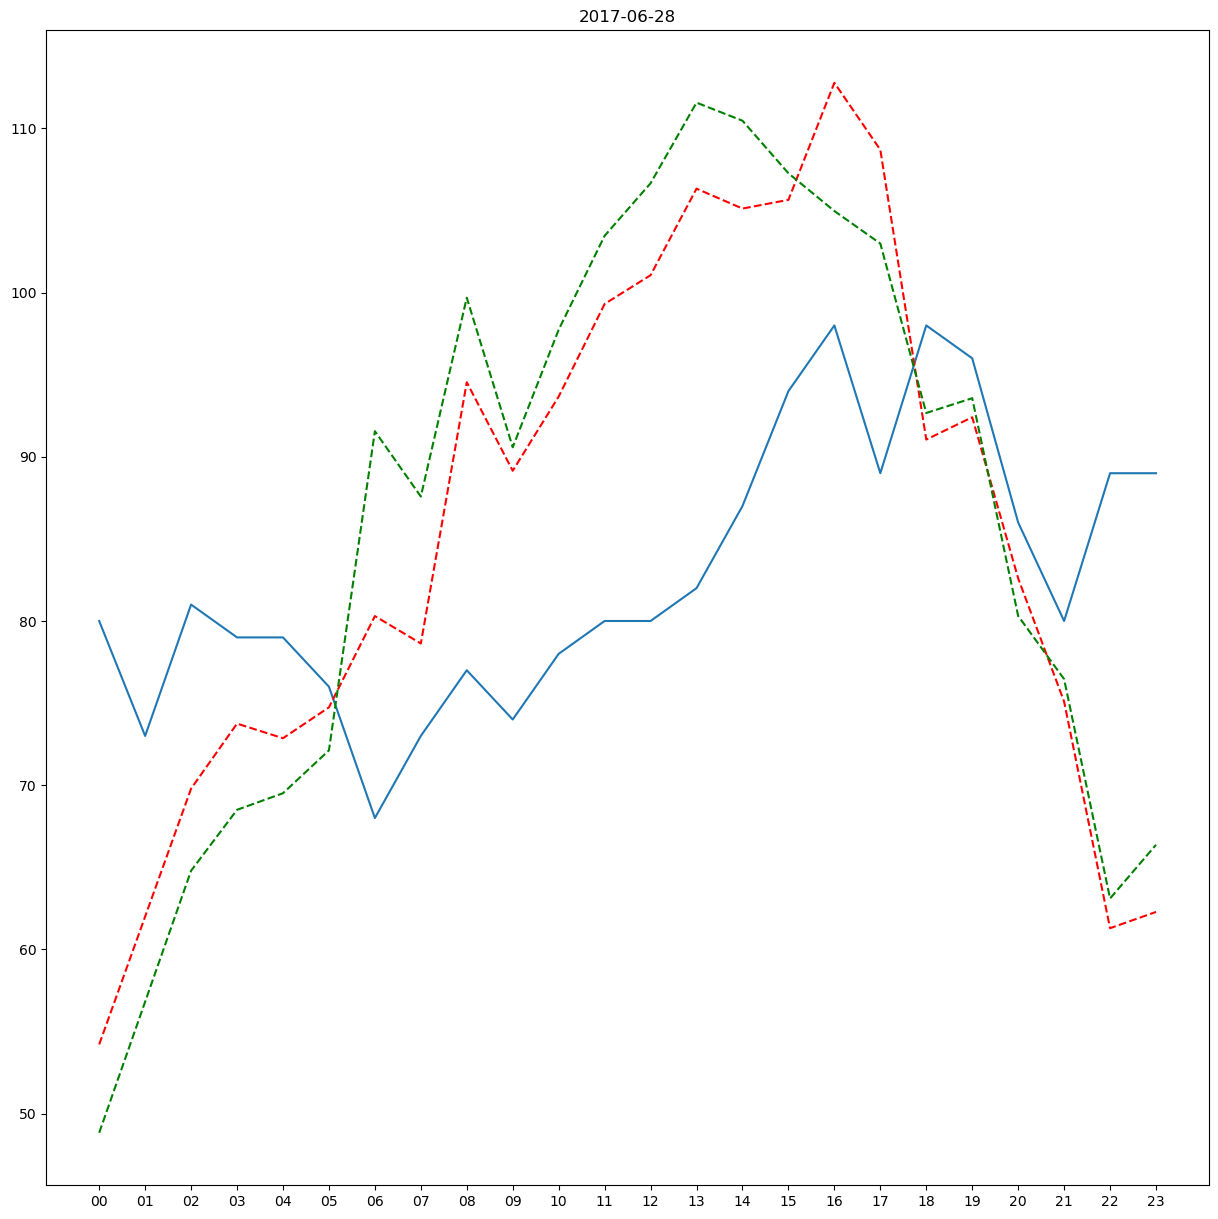

In [9]:
#plot a day where r2 is < than 0 
date_str = '2017-06-28'
date_obj = pd.to_datetime(date_str)
#means that the estimation was worse than the mean
for day, group in dayGrup:
        if pd.Timestamp(day) == date_obj:
                plt.plot(group.index.strftime("%H"), group['RefSt'])
                plt.plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
                plt.plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green') 
                plt.title(day)
                #add dimension to the plot
                plt.gcf().set_size_inches(15, 15)
                plt.show()



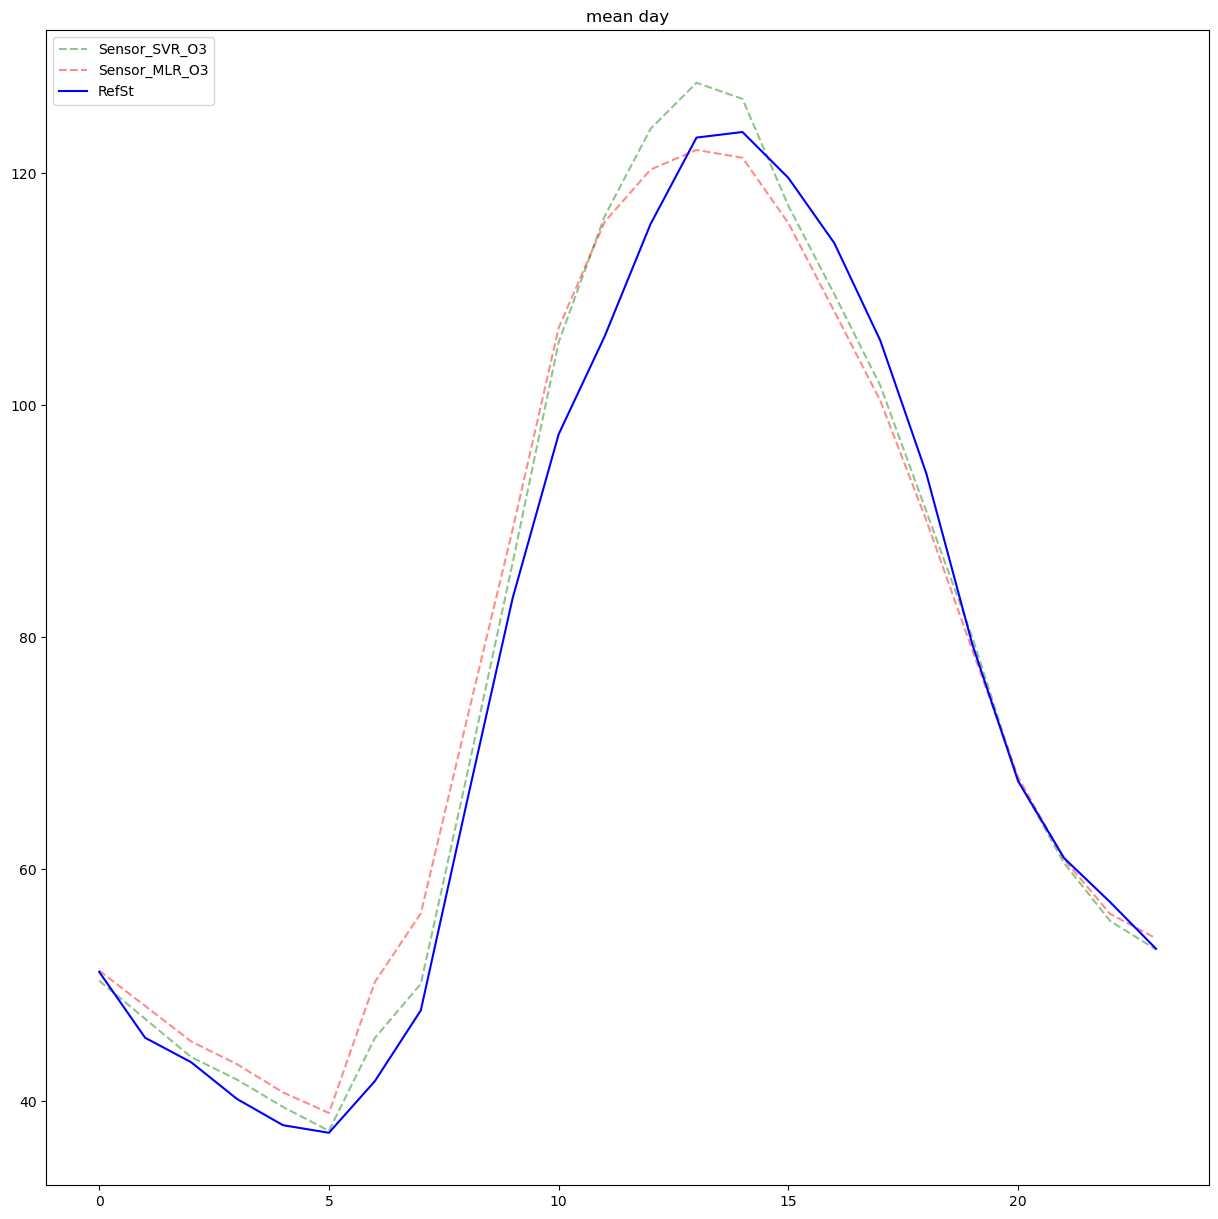

In [10]:
#caluclate mean day of each hour for each sensor in the complete days
mean_MLR_day = []
mean_SVR_day = []
mean_RefSt_day = []

completeDays_hours = pd.DataFrame = filtered.groupby(filtered.index.hour)
for hour, group in completeDays_hours:
    mean_MLR_day.append(np.mean(group['Sensor_MLR_O3']))
    mean_SVR_day.append(np.mean(group['Sensor_SVR_O3']))
    mean_RefSt_day.append(np.mean(group['RefSt']))



#plot the mean day
plt.plot(mean_SVR_day, color='green',alpha=0.45, linestyle='dashed')
plt.plot(mean_MLR_day,  color='red',alpha=0.45, linestyle='dashed')
plt.plot(mean_RefSt_day,  color='blue')
plt.legend(['Sensor_SVR_O3', 'Sensor_MLR_O3','RefSt'], loc='upper left')
plt.title('mean day')
#set the dimensions of the figure
plt.gcf().set_size_inches(15, 15)
plt.show()     


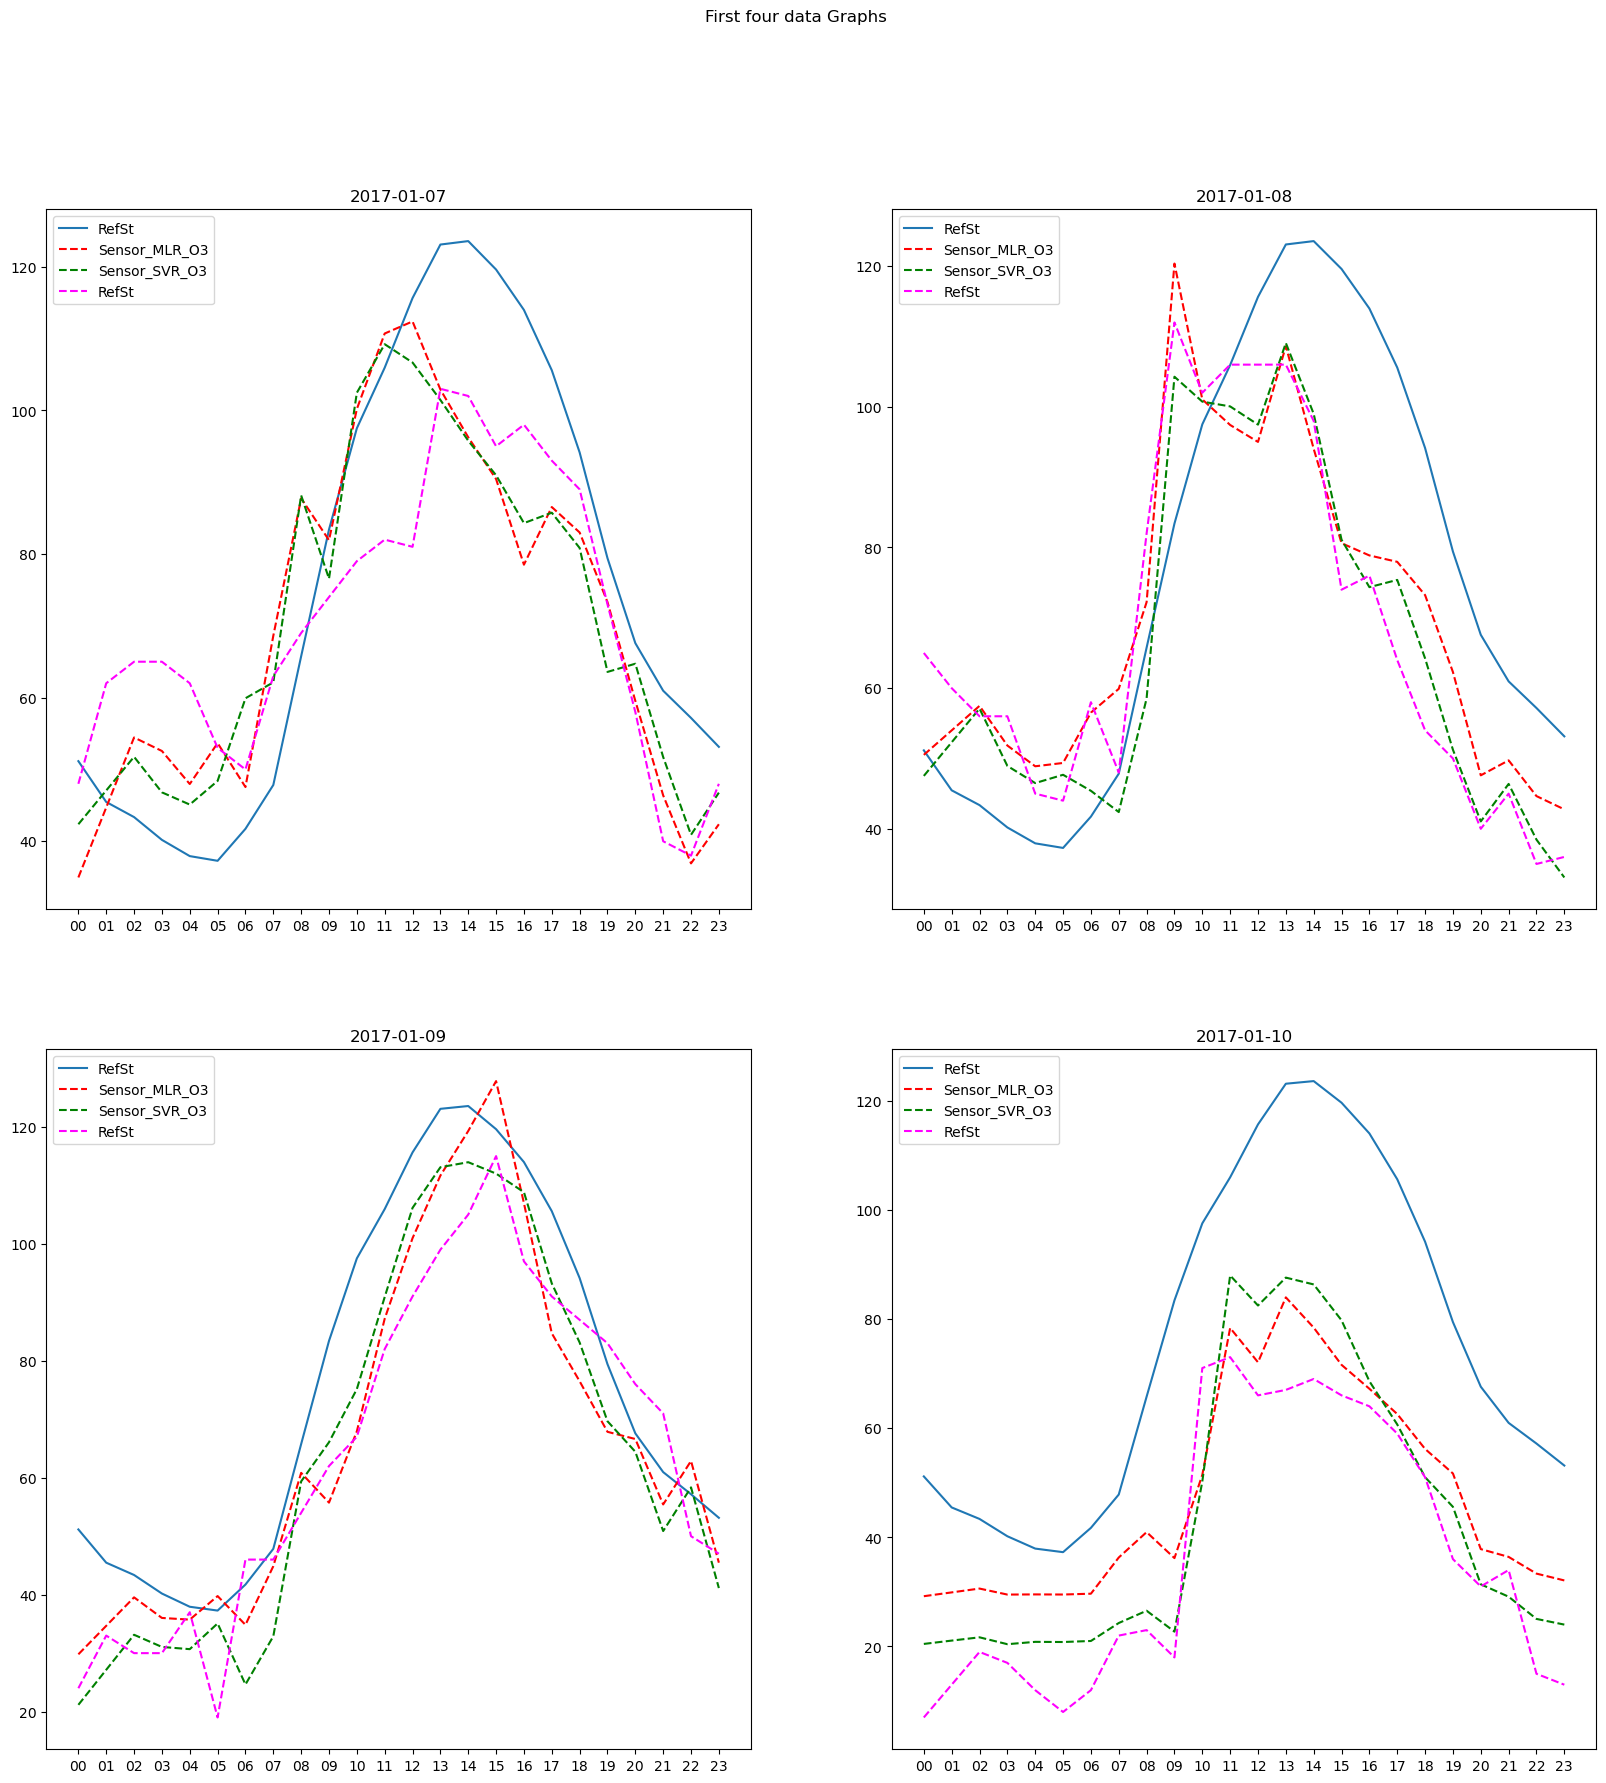

(24, 104)
[[ 34.96  50.51  29.8  ...  58.41  50.81  54.03]
 [ 44.7   53.99  34.67 ...  54.96  46.27  55.99]
 [ 54.45  57.48  39.54 ...  51.5   41.73  57.95]
 ...
 [ 68.61  59.9   44.87 ...  57.63  50.17  60.38]
 [ 87.75  72.23  60.83 ...  81.58  74.69  69.46]
 [ 81.92 120.37  55.74 ... 105.55 102.18  74.66]]
[[-16.19384615  -0.64384615 -21.35384615 ...   7.25615385  -0.34384615
    2.87615385]
 [ -0.77115385   8.51884615 -10.80115385 ...   9.48884615   0.79884615
   10.51884615]
 [ 11.08461538  14.11461538  -3.82538462 ...   8.13461538  -1.63538462
   14.58461538]
 ...
 [ 20.77346154  12.06346154  -2.96653846 ...   9.79346154   2.33346154
   12.54346154]
 [ 21.99038462   6.47038462  -4.92961538 ...  15.82038462   8.93038462
    3.70038462]
 [ -1.48384615  36.96615385 -27.66384615 ...  22.14615385  18.77615385
   -8.74384615]]


In [11]:

#for each day, plot the line chart
i =0
# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

for day, group in completeDays:
    if i > 3:
        break
    #df.index.time cast to a string
    if i==0 :
        axs[0,0].plot(mean_RefSt_day)
        axs[0,0].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[0,0].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green')
        axs[0,0].plot(group.index.strftime("%H"), group['RefSt'], linestyle='dashed', color='magenta')
        axs[0,0].set_title(day)
        #add legend
        axs[0,0].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3','RefSt'], loc='upper left')
    elif i==1:
        axs[0,1].plot(mean_RefSt_day)
        axs[0,1].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[0,1].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green')
        axs[0,1].plot(group.index.strftime("%H"), group['RefSt'], linestyle='dashed', color='magenta')
        axs[0,1].set_title(day)
        #add legend
        axs[0,1].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3','RefSt'], loc='upper left')
    elif i==2:
        axs[1,0].plot(mean_RefSt_day)
        axs[1,0].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[1,0].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green')
        axs[1,0].plot(group.index.strftime("%H"), group['RefSt'], linestyle='dashed', color='magenta') 
        axs[1,0].set_title(day)
        #add legend
        axs[1,0].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3','RefSt'], loc='upper left')
    elif i==3:
        axs[1,1].plot(mean_RefSt_day)
        axs[1,1].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[1,1].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green')
        axs[1,1].plot(group.index.strftime("%H"), group['RefSt'], linestyle='dashed', color='magenta')
        axs[1,1].set_title(day)
        #add legend
        axs[1,1].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3','RefSt'], loc='upper left')
    i+=1


# Add a title to the figure
fig.suptitle('First four data Graphs')
fig.set_figheight(20)
fig.set_figwidth(20)

# Display the figure
plt.show()

#create a matrix of the data each column is a day and each row is an hour
data = np.zeros((24, len(completeDays)))
i = 0
for day, group in completeDays:
    data[:,i] = group['Sensor_MLR_O3'].values
    i+=1
data_sub = data
print(data_sub.shape)

#print frit 10 element of the matrix
print(data_sub[:10,:])

#subturct to each column the mean_RefSt_day
for i in range(len(completeDays)):
    data_sub[:,i] = data_sub[:,i] - mean_RefSt_day

print(data_sub[:10,:])   

#caluclate the trucated SVD 


In [12]:
#calculate the SVD
U, s, VT = np.linalg.svd(data, full_matrices=False)
print(U.shape)
print(s.shape)
print(VT.shape)

def truncate(k):
    Uk = U[:, :k]
    return Uk

print(truncate(1))


(24, 24)
(24,)
(24, 104)
[[0.0807552 ]
 [0.08611601]
 [0.08431565]
 [0.08838859]
 [0.0723928 ]
 [0.07334317]
 [0.18009221]
 [0.17221412]
 [0.22652892]
 [0.27303789]
 [0.32129542]
 [0.30575956]
 [0.3024763 ]
 [0.28682041]
 [0.26218113]
 [0.24507682]
 [0.21787281]
 [0.22474671]
 [0.21965509]
 [0.21621748]
 [0.16859361]
 [0.14188021]
 [0.12260232]
 [0.1293168 ]]


In [13]:

#function to convert the dataframe to matrix
def df_to_matrix(df):
    matrix = np.zeros((24, len(completeDays)))
    i = 0
    for _, group in completeDays:
        matrix[:,i] = group[df].values
        i+=1
    return matrix


#function to subtruct the mean_RefSt_day from the matrix
def data_sub_meanREF(data_matrix):
    data_matrix_sub = data_matrix
    for i in range(len(completeDays)):
        data_matrix_sub[:,i] = data_matrix_sub[:,i] - mean_RefSt_day
    return data_matrix_sub
#function to calculate the SVD
def calc_U_SVD(data):
    U,_ , _ = np.linalg.svd(data, full_matrices=False)
    return U
#function to truncate the SVD
def truncate(matrix,k):
    U = calc_U_SVD(matrix)
    Uk = U[:, :k]
    return Uk

#function to denoise the data given the matrix(row data) of the data and the k
def denoise(matrix, k):
    mat_sub = data_sub_meanREF(matrix)

    denoise = np.zeros((24, len(completeDays)))
    for i in range(len(completeDays)):
        denoise[:,i] = mean_RefSt_day + truncate(mat_sub,k) @ truncate(mat_sub,k).T @ data_sub[:,i]
    return denoise

#function to calculate the RMSE given the denoise matrix
def calc_RMSE(denoise):
    RMSE_denoise = []
    for i in range(len(completeDays)):
        RMSE_denoise.append(np.sqrt(mean_squared_error(completeDays.get_group(list(completeDays.groups.keys())[i])['RefSt'], denoise[:,i])))
    return RMSE_denoise

#function to calculate the r2_score given the denoise matrix
def calc_r2(denoise):
    r2_denoise = []
    for i in range(len(completeDays)):
        r2_denoise.append(r2_score(completeDays.get_group(list(completeDays.groups.keys())[i])['RefSt'], denoise[:,i],force_finite=False))
    return r2_denoise


In [14]:
#extract singular values for the the MLR data
data_MLR = df_to_matrix('Sensor_MLR_O3')
U_MLR, s_MLR, VT_MLR = np.linalg.svd(data_MLR, full_matrices=True)

#get the meadian of the singular values
median_MLR = np.median(s_MLR)

#calulate w(β) ≈ 0.56β^3 − 0.95β^2 + 1.82β + 1.43 with b = 103/24
b = data_MLR.shape[0]/data_MLR.shape[1]
print(b)   
w = 0.56*b**3 - 0.95*b**2 + 1.82*b + 1.43



#calculate the singThreshold
singThreshold_MLR = w*median_MLR

#calculate the number of singular values that are greater than the singThreshold
r_MLR = 0
for i in range(len(s_MLR)):
    if s_MLR[i] > singThreshold_MLR:
        r_MLR += 1

print(r_MLR)

#extract singular values for the the SVR data
data_SVR = df_to_matrix('Sensor_SVR_O3')
U_SVR, s_SVR, VT_SVR = np.linalg.svd(data_SVR, full_matrices=True)

median_SVR = np.median(s_SVR)
#calulate w(β) ≈ 0.56β^3 − 0.95β^2 + 1.82β + 1.43 with b = 103/24
b = data_SVR.shape[0]/data_SVR.shape[1]
w = 0.56*b**3 - 0.95*b**2 + 1.82*b + 1.43

#calculate the singThreshold
singThreshold_SVR = w*median_SVR

#calculate the number of singular values that are greater than the singThreshold
r_SVR = 0
for i in range(len(s_SVR)):
    if s_SVR[i] > singThreshold_SVR:
        r_SVR += 1

print(r_SVR)

#compute the singual values fo the RefSt data
data_RefSt = df_to_matrix('RefSt')
U_RefSt, s_RefSt, VT_RefSt = np.linalg.svd(data_RefSt, full_matrices=True)

median_RefSt = np.median(s_RefSt)
print (median_RefSt)
recalculated_singThreshold_RefSt = w*median_RefSt
print(recalculated_singThreshold_RefSt)

#calculate the number of singular values that are greater than the singThreshold
r_RefSt = 0
for i in range(len(s_RefSt)):
    if s_RefSt[i] > recalculated_singThreshold_RefSt:
        r_RefSt += 1

print(r_RefSt)








0.23076923076923078
7
7
74.01450678500072
133.69169277001936
7


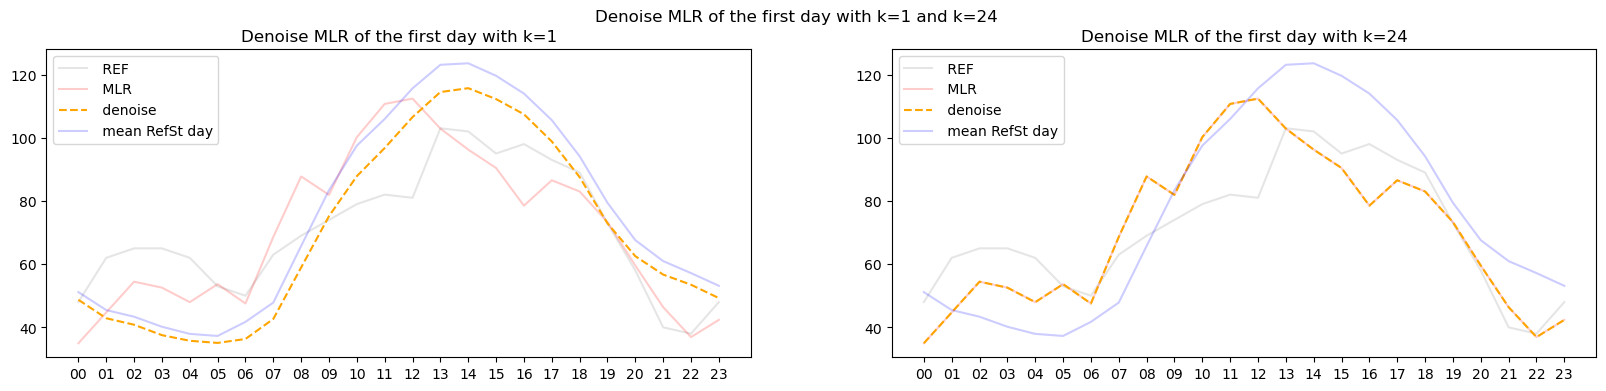

In [23]:
#test to check if the function are follows the Theroy

#for each k, calculate the denoise matrix and the RMSE
RMSE_MLR_denoise = []
data_MLR = df_to_matrix('Sensor_MLR_O3')

denoise_MLR = denoise(data_MLR, 1)
RMSE_MLR_denoise.append(calc_RMSE(denoise_MLR))

day = 0
#create a subplot of 1 row and 2 columns
fig, axs = plt.subplots(1, 2)
a = 0.2
#plot first day of the denoise matrix
axs[0].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['RefSt'],label=" REF", color='gray',alpha=a)
axs[0].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['Sensor_MLR_O3'],label=" MLR", color='red',alpha=a)
axs[0].plot(denoise_MLR[:,day],label=" denoise", color='orange', linestyle='dashed')
axs[0].plot(mean_RefSt_day,  color='blue', label=" mean RefSt day",alpha=a)
axs[0].legend(loc='upper left')
axs[0].set_title('Denoise MLR of the first day with k=1')

denoise_MLR = denoise(data_MLR, 24)
RMSE_MLR_denoise.append(calc_RMSE(denoise_MLR))

#plot the RMSE for k = 24
axs[1].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['RefSt'],label=" REF", color='gray',alpha=a)
axs[1].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['Sensor_MLR_O3'],label=" MLR", color='red',alpha=a)
axs[1].plot(denoise_MLR[:,day],label=" denoise", color='orange', linestyle='dashed')
axs[1].plot(mean_RefSt_day,  color='blue', label=" mean RefSt day",alpha=a)
axs[1].legend(loc='upper left')
axs[1].set_title('Denoise MLR of the first day with k=24')

fig.suptitle('Denoise MLR of the first day with k=1 and k=24')
#fig dimensions
fig.set_figheight(4)
fig.set_figwidth(20)
plt.show()





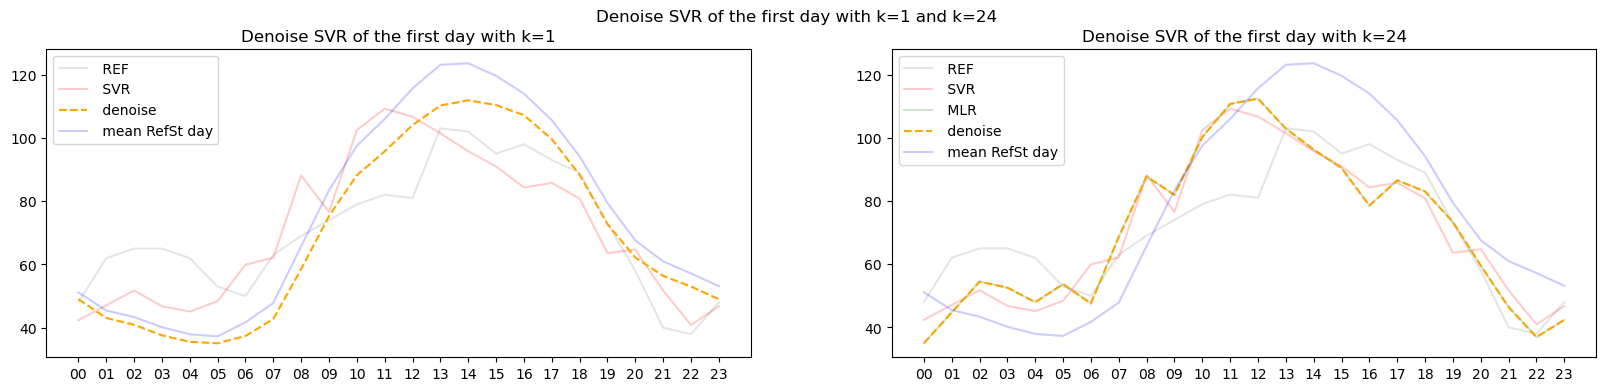

In [29]:
#test to check if the function are follows the Theroy

#for each k, calculate the denoise matrix and the RMSE
RMSE_SVR_denoise = []
data_SVR = df_to_matrix('Sensor_SVR_O3')


mat_sub = data_sub_meanREF(data_SVR)



denoise = np.zeros((24, len(completeDays)))
for i in range(len(completeDays)):
    denoise[:,i] = mean_RefSt_day + truncate(mat_sub,1) @ truncate(mat_sub,1).T @ data_sub[:,i]

denoise_SVR = denoise
RMSE_SVR_denoise.append(calc_RMSE(denoise_SVR))

day = 0
#create a subplot of 1 row and 2 columns
fig, axs = plt.subplots(1, 2)
a = 0.2
#plot first day of the denoise matrix
axs[0].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['RefSt'],label=" REF", color='gray',alpha=a)
axs[0].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['Sensor_SVR_O3'],label=" SVR", color='red',alpha=a)
axs[0].plot(denoise_SVR[:,day],label=" denoise", color='orange', linestyle='dashed')
axs[0].plot(mean_RefSt_day,  color='blue', label=" mean RefSt day",alpha=a)
axs[0].legend(loc='upper left')
axs[0].set_title('Denoise SVR of the first day with k=1')
k=103
denoise = np.zeros((24, len(completeDays)))
for i in range(len(completeDays)):
    denoise[:,i] = mean_RefSt_day + truncate(mat_sub,k) @ truncate(mat_sub,k).T @ data_sub[:,i]

denoise_SVR = denoise

RMSE_SVR_denoise.append(calc_RMSE(denoise_SVR))

#plot the RMSE for k = 24
axs[1].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['RefSt'],label=" REF", color='gray',alpha=a)
axs[1].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['Sensor_SVR_O3'],label=" SVR", color='red',alpha=a)
axs[1].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['Sensor_MLR_O3'],label=" MLR", color='green',alpha=a)

axs[1].plot(denoise_SVR[:,day],label=" denoise", color='orange', linestyle='dashed')
axs[1].plot(mean_RefSt_day,  color='blue', label=" mean RefSt day",alpha=a)
axs[1].legend(loc='upper left')
axs[1].set_title('Denoise SVR of the first day with k=24')

fig.suptitle('Denoise SVR of the first day with k=1 and k=24')
#fig dimensions
fig.set_figheight(4)
fig.set_figwidth(20)
plt.show()





13.393824106897734


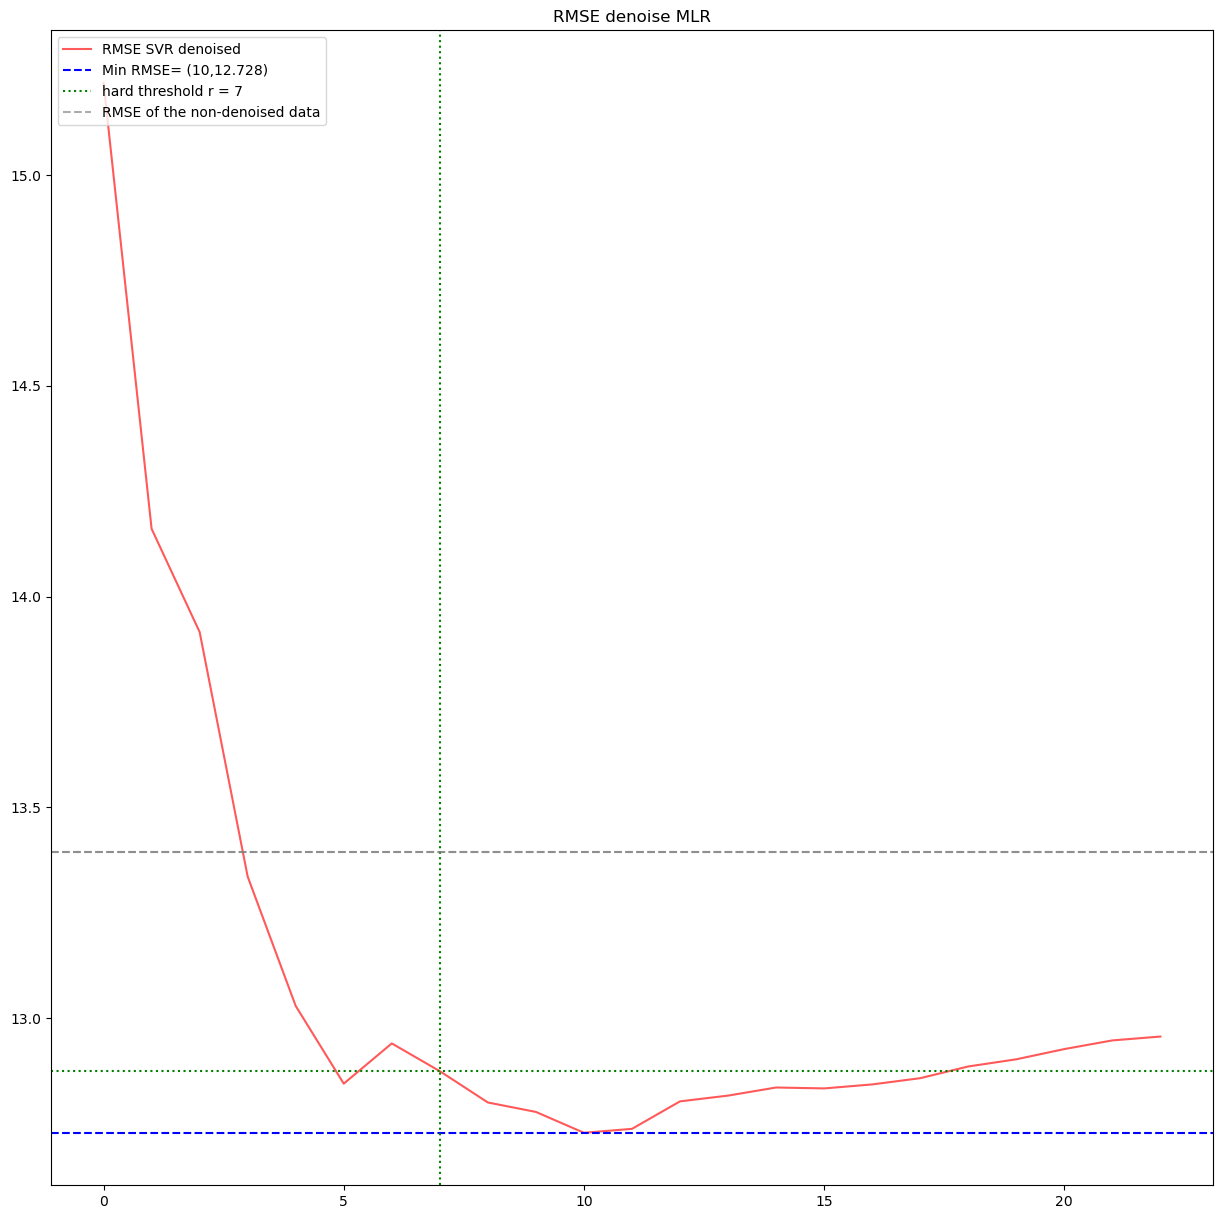

In [17]:
#calculate the RMSE for each day, and the mean of the RMSE
RMSE_MLR_denoise = np.zeros((24, len(completeDays)))
RMSE_MLR_denoise_mean = []

data_MLR = df_to_matrix('Sensor_MLR_O3')

#for each k calc the mean of the RMSE
for k in range(1,24):
    denoise_MLR = denoise(data_MLR, k)
    RMSE_MLR_denoise = calc_RMSE(denoise_MLR)
    #calc the mean of the RMSE for each day append it to the list
    RMSE_MLR_denoise_mean.append(np.mean(RMSE_MLR_denoise))

#plot the mean of the RMSE for each k
plt.plot(RMSE_MLR_denoise_mean, color='red',alpha=0.65)
plt.title('RMSE denoise MLR')
# show in the plto the lowest RMSE
plt.axhline(np.min(RMSE_MLR_denoise_mean), color='blue', linestyle='dashed')
#plot the RMSE of the fifth k
plt.axhline(RMSE_MLR_denoise_mean[r_MLR], color='green', linestyle='dotted')
plt.axhline(mean_MLR,alpha=0.65, color='gray', linestyle='dashed')

plt.axvline(r_MLR, color='green', linestyle='dotted')
#set the dimensions of the figure
plt.gcf().set_size_inches(15, 15)

#get the index of the min RMSE
index_min = np.argmin(RMSE_MLR_denoise_mean)

pointMin = '('+str(np.argmin(RMSE_MLR_denoise_mean))+','+str(round(np.min(RMSE_MLR_denoise_mean),3))+')'
#plot the RMSE obtained in the beginning
plt.axhline(mean_MLR,alpha=0.65, color='gray', linestyle='dashed')
plt.legend(['RMSE SVR denoised', 'Min RMSE= '+pointMin,'hard threshold r = '+ str(r_SVR),"RMSE of the non-denoised data"], loc='upper left')

print(mean_MLR)

plt.show()


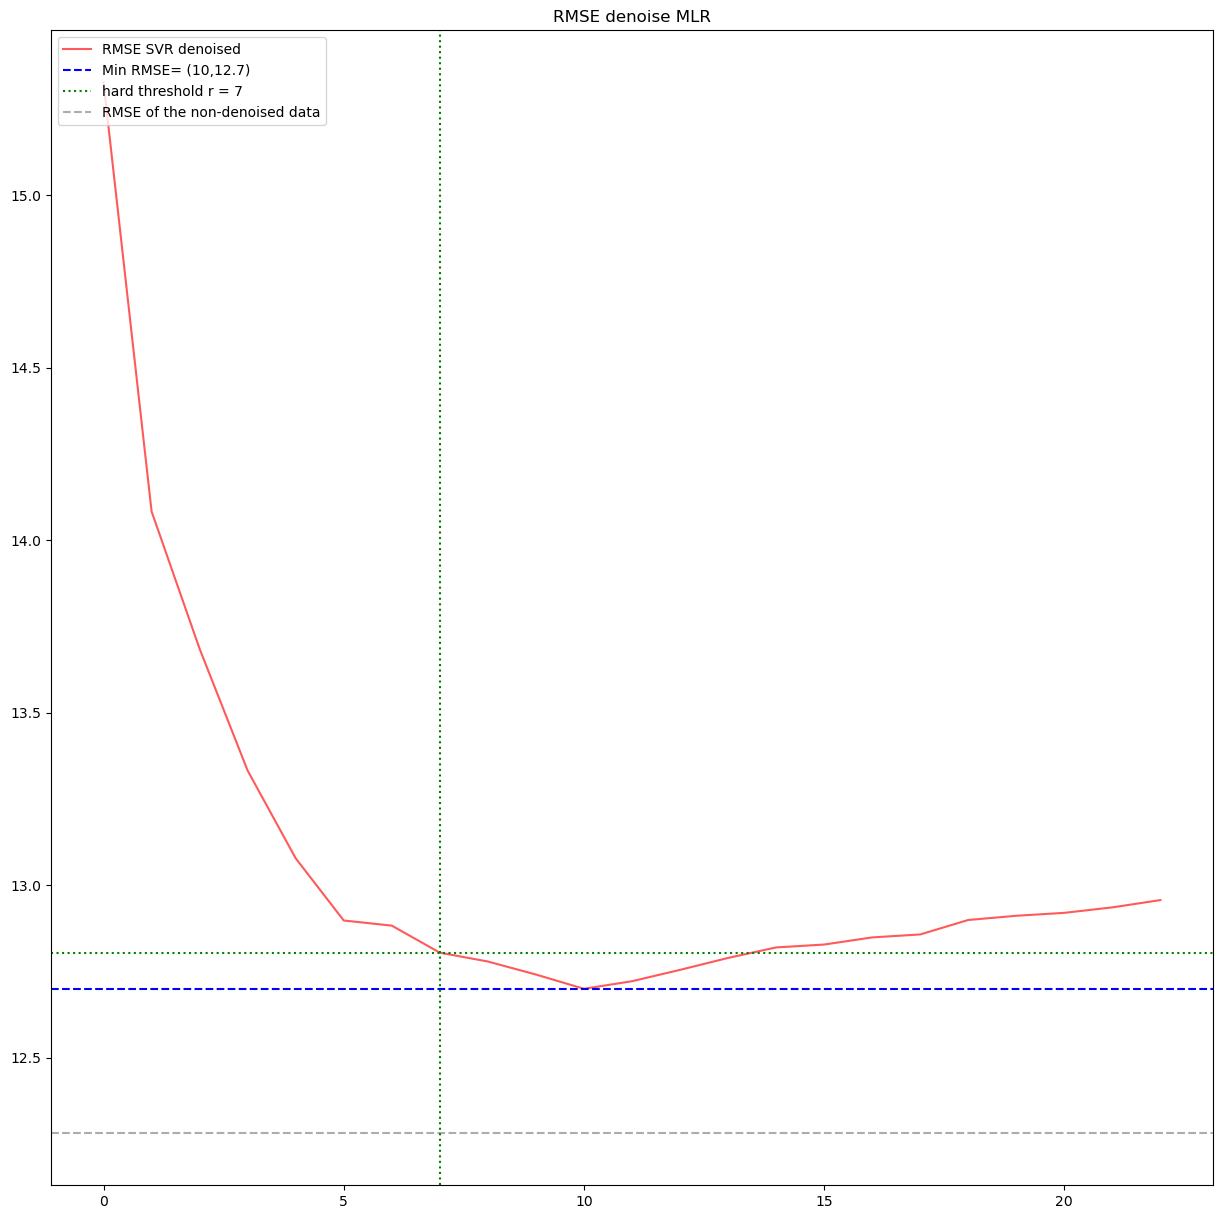

In [18]:
#calculate the RMSE for each day, and the mean of the RMSE
RMSE_SVR_denoise = np.zeros((24, len(completeDays)))
RMSE_SVR_denoise_mean = []

data_SVR = df_to_matrix('Sensor_SVR_O3')

#for each k calc the mean of the RMSE
for k in range(1,24):
    denoise_SVR = denoise(data_SVR, k)
    RMSE_SVR_denoise = calc_RMSE(denoise_SVR)
    #calc the mean of the RMSE for each day append it to the list
    RMSE_SVR_denoise_mean.append(np.mean(RMSE_SVR_denoise))

#plot the mean of the RMSE for each k
plt.plot(RMSE_SVR_denoise_mean, color='red',alpha=0.65)
plt.title('RMSE denoise MLR')
# show in the plto the lowest RMSE
plt.axhline(np.min(RMSE_SVR_denoise_mean), color='blue', linestyle='dashed')
#plot the RMSE of the fifth k
plt.axhline(RMSE_SVR_denoise_mean[r_SVR], color='green', linestyle='dotted')
plt.axhline(mean_SVR,alpha=0.65, color='gray', linestyle='dashed')

plt.axvline(r_SVR, color='green', linestyle='dotted')
#set the dimensions of the figure
plt.gcf().set_size_inches(15, 15)
#add legend

#get the index of the min RMSE
index_min = np.argmin(RMSE_SVR_denoise_mean)

pointMin = '('+str(np.argmin(RMSE_SVR_denoise_mean))+','+str(round(np.min(RMSE_SVR_denoise_mean),1))+')'
plt.legend(['RMSE SVR denoised', 'Min RMSE= '+pointMin,'hard threshold r = '+ str(r_SVR),"RMSE of the non-denoised data"], loc='upper left')


plt.show()


Text(0.5, 1.0, 'singular values')

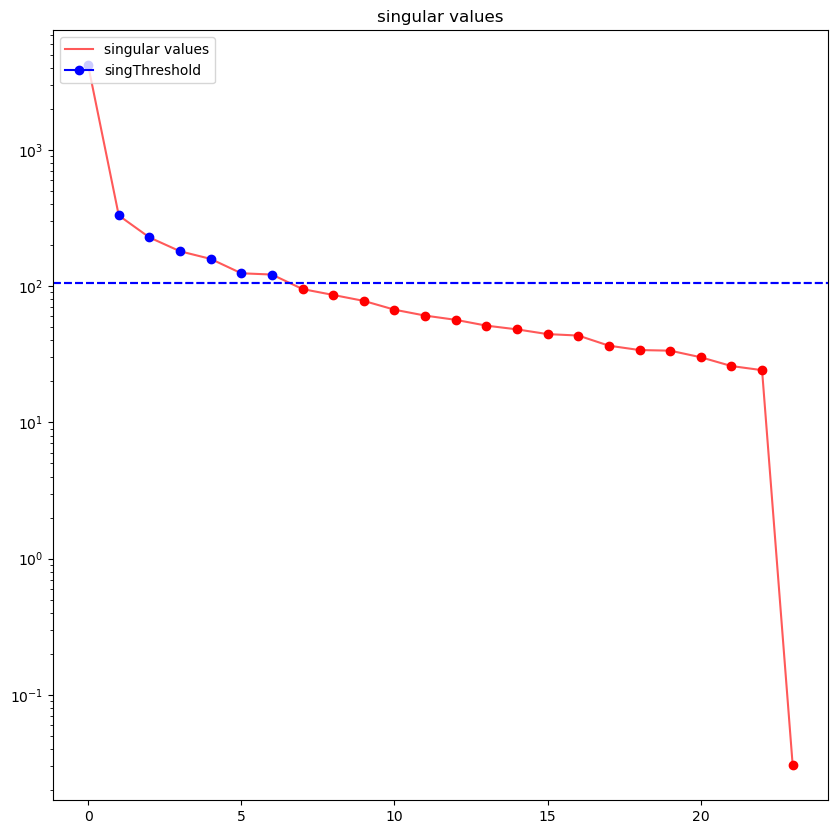

In [19]:
#draw a curve with the singular values in log scale
plt.plot(s_MLR, color='red',alpha=0.65)
# each point circled if it is greater than the singThreshold
for i in range(len(s_MLR)):
    if s_MLR[i] > singThreshold_MLR:
        plt.plot(i,s_MLR[i],marker='o', color='blue')
# each point circled if it is lower than the singThreshold
    else:
        plt.plot(i,s_MLR[i],marker='o', color='red')
#plot the singThreshold
plt.axhline(singThreshold_MLR, color='blue', linestyle='dashed')
#set the dimensions of the figure
plt.gcf().set_size_inches(10, 10)
plt.yscale('log')

#add legend
plt.legend(['singular values', 'singThreshold'], loc='upper left')

#plot the singThreshold
plt.axhline(singThreshold_MLR, color='blue', linestyle='dashed')


plt.title('singular values')